In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



%matplotlib inline

In [17]:
transaction=pd.read_csv('Transactions.csv')
customer=pd.read_csv('Customer.csv')
prod_info=pd.read_csv('prod_cat_info.csv')

In [12]:
prod_info.rename(columns={"prod_sub_cat_code":"prod_subcat_code"},inplace=True)

In [13]:
var1 = pd.merge(left=transaction, right=customer,left_on='cust_id',right_on='customer_Id',how="left")

In [14]:
var2 = pd.merge(left=var1, right=prod_info,on=['prod_subcat_code','prod_cat_code'],how="left")

In [15]:
var2["DOB"] = pd.to_datetime(var2["DOB"], format="%d-%m-%Y")

In [16]:
var2["tran_date"] = pd.to_datetime(var2["tran_date"])

In [52]:
var2.drop_duplicates(inplace=True)

In [53]:
var2.dropna(subset=['tran_date','DOB'],inplace=True)

In [54]:
var2.isna().sum()

transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
customer_Id         0
DOB                 0
Gender              9
city_code           8
prod_cat            0
prod_subcat         0
dtype: int64

In [55]:
#2. Prepare a summary report for the merged data set.  
#a. Get the column names and their corresponding data types  
var2.columns

Index(['transaction_id', 'cust_id', 'tran_date', 'prod_subcat_code',
       'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type',
       'customer_Id', 'DOB', 'Gender', 'city_code', 'prod_cat', 'prod_subcat'],
      dtype='object')

In [56]:
var2.drop_duplicates(inplace=True)

In [57]:
var2.duplicated().sum()

0

In [58]:
var2.dtypes

transaction_id               int64
cust_id                      int64
tran_date           datetime64[ns]
prod_subcat_code             int64
prod_cat_code                int64
Qty                          int64
Rate                         int64
Tax                        float64
total_amt                  float64
Store_type                  object
customer_Id                  int64
DOB                 datetime64[ns]
Gender                      object
city_code                  float64
prod_cat                    object
prod_subcat                 object
dtype: object

In [59]:
#b. Top/Bottom 10 observation
var2.head(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_subcat
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,1981-09-26,M,5.0,Clothing,Women
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,270384,1973-05-11,F,8.0,Electronics,Computers
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,273420,1992-07-27,M,8.0,Books,DIY
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,271509,1981-06-08,M,3.0,Home and kitchen,Bath
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,273420,1992-07-27,M,8.0,Books,DIY
5,97439039119,272357,2014-02-23,8,3,-2,-824,173.040,-1821.040,TeleShop,272357,1982-10-09,F,6.0,Electronics,Personal Appliances
6,45649838090,273667,2014-02-22,11,6,-1,-1450,152.250,-1602.250,e-Shop,273667,1981-05-29,M,9.0,Home and kitchen,Bath
7,22643667930,271489,2014-02-22,12,6,-1,-1225,128.625,-1353.625,TeleShop,271489,1971-04-21,M,9.0,Home and kitchen,Tools
8,79792372943,275108,2014-02-22,3,1,-3,-908,286.020,-3010.020,MBR,275108,1971-11-04,F,8.0,Clothing,Kids
9,50076728598,269014,2014-02-21,8,3,-4,-581,244.020,-2568.020,e-Shop,269014,1979-11-27,F,3.0,Electronics,Personal Appliances


In [60]:
var2.tail(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_subcat
23043,49882891062,271982,2011-01-25,10,5,4,1330,558.600,5878.600,e-Shop,271982,1976-08-10,M,8.0,Books,Non-Fiction
23044,14787475597,273982,2011-01-25,4,3,5,969,508.725,5353.725,e-Shop,273982,1991-10-12,M,4.0,Electronics,Mobiles
23045,50691119572,273031,2011-01-25,6,5,1,1148,120.540,1268.540,TeleShop,273031,1980-01-17,F,8.0,Books,DIY
23046,40893803228,272049,2011-01-25,11,6,3,1077,339.255,3570.255,e-Shop,272049,1975-06-28,F,6.0,Home and kitchen,Bath
23047,30856003613,266866,2011-01-25,4,2,2,444,93.240,981.240,TeleShop,266866,1974-04-18,M,4.0,Footwear,Kids
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,274550,1972-02-21,M,7.0,Books,Academic
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,270022,1984-04-27,M,9.0,Clothing,Mens
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,271020,1976-06-20,M,8.0,Home and kitchen,Furnishing
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,270911,1970-05-22,M,2.0,Books,Children
23052,77960931771,271961,2011-01-25,11,5,1,447,46.935,493.935,TeleShop,271961,1982-01-15,M,1.0,Books,Children


In [61]:
#c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [62]:
var=var2.loc[:,['Qty','Rate','Tax','total_amt']]

In [63]:
def summary(x):
    min1=x.min()
    pc1=x.quantile(0.25)
    pc2=x.quantile(0.5)
    pc3=x.quantile(0.75)
    max1=x.max()
  
    return pd.Series([min1,pc1,pc2,pc3,max1],index=['min','Q1','Median','Q3','Max'])

In [64]:
var.apply(summary)

,Qty,Rate,Tax,total_amt
min,-5.0,-1499.0,7.3500,-8270.925
Q1,1.0,312.0,98.2800,762.450
Median,3.0,710.0,199.0800,1756.950
Q3,4.0,1109.0,365.7675,3570.255
Max,5.0,1500.0,787.5000,8287.500


In [65]:
#d. Frequency tables for all the categorical variables

In [66]:
def freqency_table(x):
    count1=x.count()
    unique1=x.nunique()
    
  
    return pd.Series([count1,unique1],index=['count','unique_values'])

In [67]:
var2.select_dtypes(include='object').apply(freqency_table)

,Store_type,Gender,prod_cat,prod_subcat
count,23040,23031,23040,23040
unique_values,4,2,6,18


In [68]:
for i in var2.columns:
      if var2[i].dtype=='object':
            print(var2[i].value_counts())


e-Shop            9304
MBR               4660
Flagship store    4575
TeleShop          4501
Name: Store_type, dtype: int64
M    11804
F    11227
Name: Gender, dtype: int64
Books               6066
Electronics         4895
Home and kitchen    4126
Footwear            2996
Clothing            2960
Bags                1997
Name: prod_cat, dtype: int64
Women                  3046
Mens                   2910
Kids                   1997
Tools                  1061
Fiction                1043
Kitchen                1036
Children               1035
Mobiles                1030
Comics                 1030
Bath                   1022
Furnishing             1007
Non-Fiction            1003
DIY                     989
Cameras                 985
Personal Appliances     970
Academic                966
Computers               958
Audio and video         952
Name: prod_subcat, dtype: int64


In [69]:
#3. Generate histograms for all continuous variables and frequency bars for categorical variables. 

In [70]:
features=['Gender','Store_type', 'prod_cat', 'prod_subcat']

In [71]:
list(enumerate(features))


[(0, 'Gender'), (1, 'Store_type'), (2, 'prod_cat'), (3, 'prod_subcat')]

In [72]:
import warnings
warnings.filterwarnings('ignore')

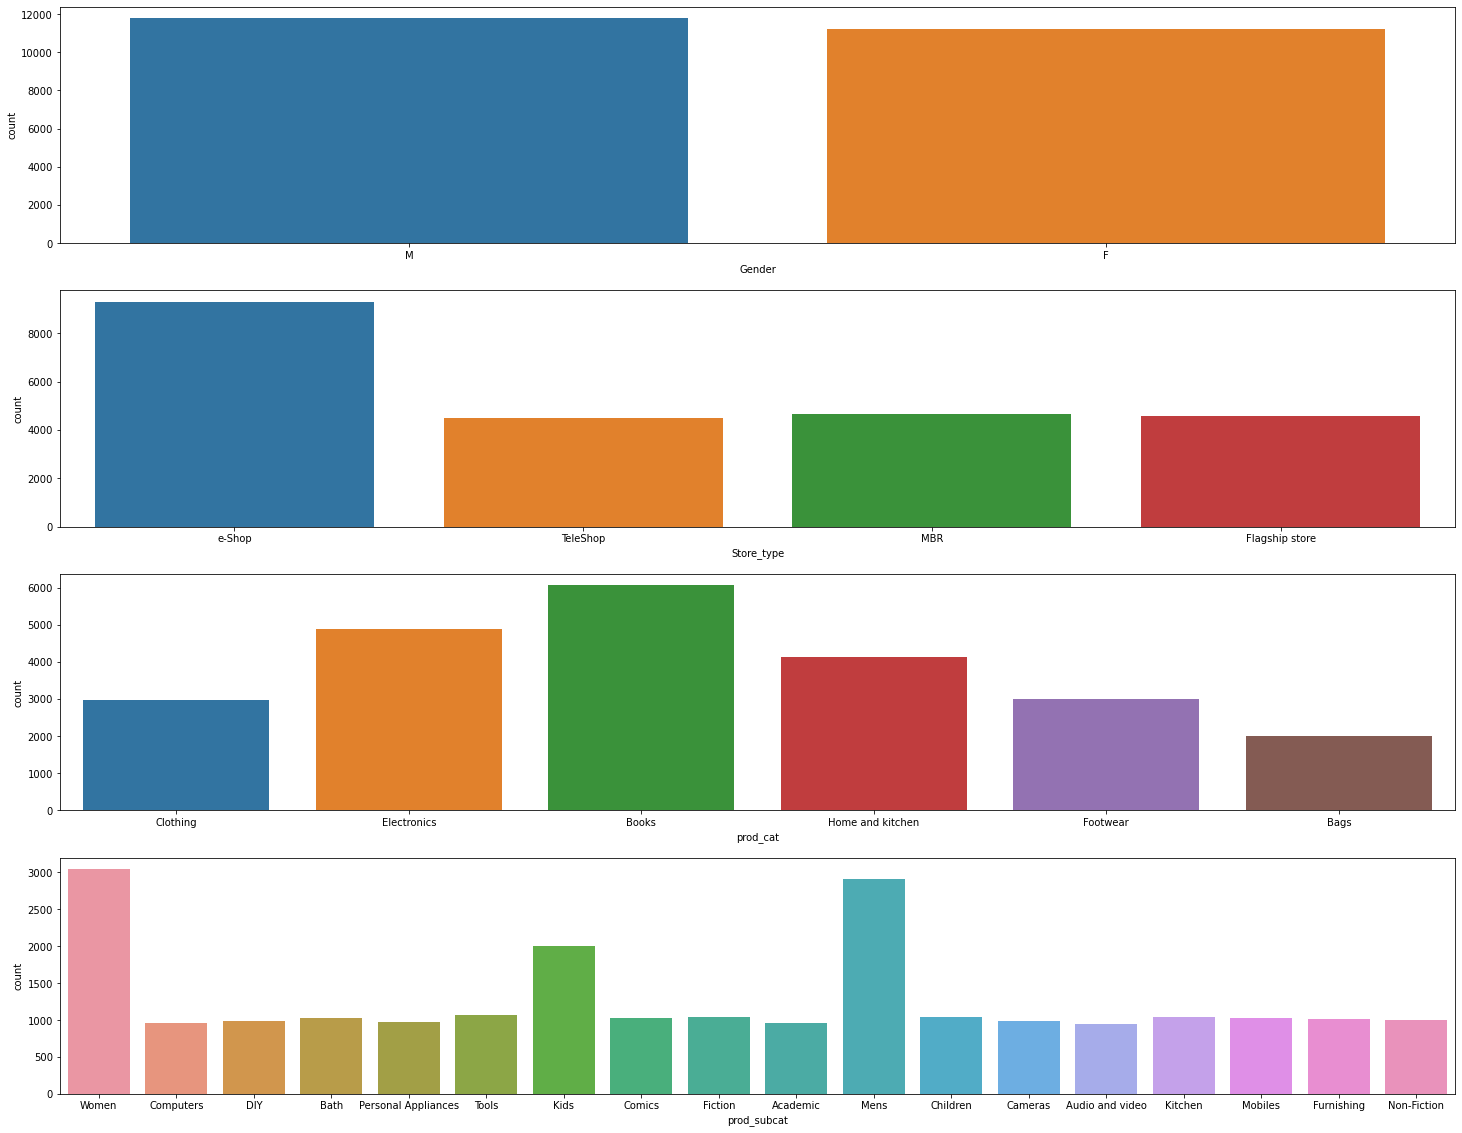

In [73]:
plt.figure(figsize=(25,20))
for i in enumerate(features):
    plt.subplot(4,1,i[0]+1)
    sns.countplot(i[1],data=var2)

In [74]:
features1=[ 'Qty','Rate', 'Tax', 'total_amt','prod_subcat_code','prod_cat_code']


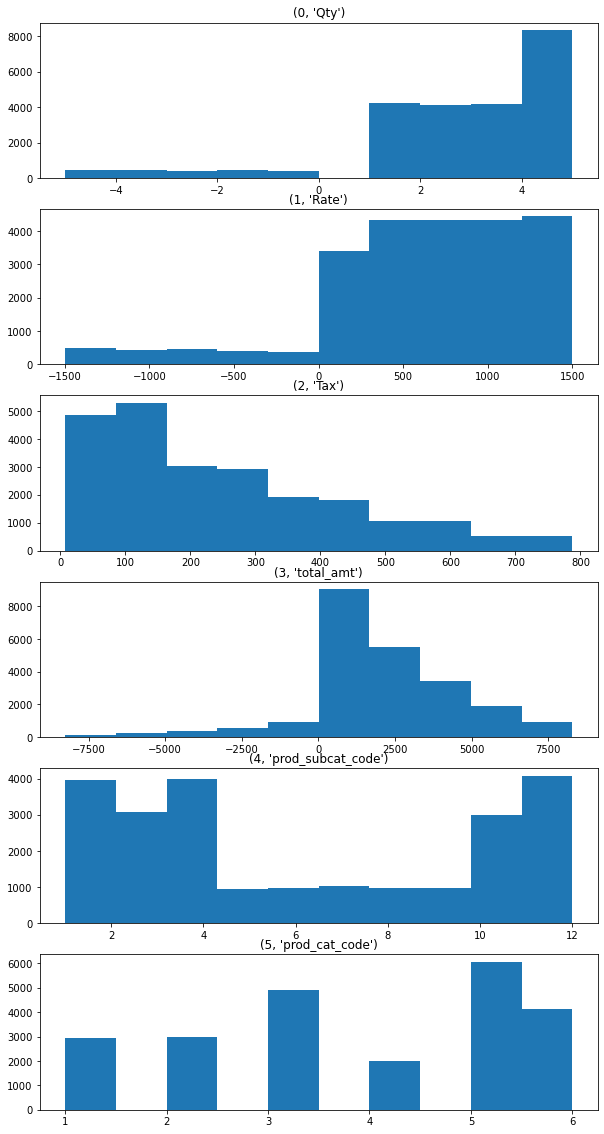

In [877]:
plt.figure(figsize=(10,20))
for i in enumerate(features1):
    plt.subplot(6,1,i[0]+1)
    plt.hist(i[1],data=var2)
    plt.title(i)


In [878]:
#4. Calculate the following information using the merged dataset :   
#a. Time period of the available transaction data  


In [75]:
print('The available time period is from ',var2.tran_date.min().strftime('%d-%B-%Y'),'to',var2.tran_date.max().strftime('%d-%B-%Y'))

The available time period is from  02-January-2011 to 02-December-2014


In [76]:
#b. Count of transactions where the total amount of transaction was negative

In [77]:
var2.loc[var2.total_amt<0,['transaction_id']].count()

transaction_id    2164
dtype: int64

In [882]:
#5. Analyze which product categories are more popular among females vs male customers.
var2.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,1981-09-26,M,5.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,1973-05-11,F,8.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,1981-06-08,M,3.0
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0


In [883]:
var2.pivot_table(index='Gender',columns=['prod_cat'],values='Qty',aggfunc='sum')

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
Gender,,,,,,
F,2364,7080,3425,5832,3721,4898
M,2346,7587,3748,6486,3561,5051


print('Products that are popular among males are :Books , Clothing ,Electronics,Home and kitchen')
print('Products that are popular among females are:Bags,Footwear')



In [884]:
#6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [78]:
c1=var2.pivot_table(index=['city_code'],values='customer_Id',aggfunc='count')
c1

,customer_Id
city_code,
1.0,2255
2.0,2268
3.0,2410
4.0,2422
5.0,2357
6.0,2127
7.0,2356
8.0,2328
9.0,2176


In [79]:
c2=var2.pivot_table(index=['city_code'],values='customer_Id',aggfunc='count').sum()
c2

customer_Id    23032
dtype: int64

In [80]:
c=c1/c2
round((c*100).sort_values(by='customer_Id',ascending=False),2).head(1)

,customer_Id
city_code,
4.0,10.52


In [81]:
#7. Which store type sells the maximum products by value and by quantity?

In [82]:
round(var2.pivot_table(index=['Store_type'],values=['total_amt','Qty'],aggfunc={'total_amt':'sum','Qty':'sum'}),1).sort_values(by=['Qty','total_amt'],ascending=False).head(1)

,Qty,total_amt
Store_type,,
e-Shop,22790,19842623.1


In [83]:
#8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores

In [84]:
var2[(var2.Store_type=='Flagship store')&((var2.prod_cat=='Electronics')|(var2.prod_cat=="Clothing"))].pivot_table(index=['Store_type','prod_cat'],values='total_amt',aggfunc='sum')

total_amt
Store_type     prod_cat               
Flagship store Clothing     1194423.23
               Electronics  2215136.04

In [86]:
#9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [87]:
var2[(var2.Gender=='M')&(var2.prod_cat=='Electronics')].pivot_table(index=['Gender','prod_cat'],values='total_amt',aggfunc='sum')

,,total_amt
Gender,prod_cat,
M,Electronics,5711351.62


In [895]:
#10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts

In [88]:
unique=var2.loc[(var2.total_amt>0),['customer_Id','transaction_id']].pivot_table(index=['customer_Id','transaction_id'],aggfunc={'transaction_id':'count'})

In [89]:
unique1=unique.pivot_table(index=['customer_Id'],values='transaction_id',aggfunc='sum')
unique1.loc[unique1.transaction_id>10]

,transaction_id
customer_Id,
266794,11
270535,11
270803,11
272741,11
273014,11
274227,11


In [898]:
#11. For all customers aged between 25 - 35, find out:    
#a. What was the total amount spent for “Electronics” and “Books” product categories?


In [4]:
now=pd.Timestamp.now()

In [5]:
now

Timestamp('2022-02-21 07:50:29.822031')

In [21]:
var2['Age']=round(((now-var2['DOB']).dt.days)/365.25,0)


In [22]:
var2

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_subcat,Age
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,1981-09-26,M,5.0,Clothing,Women,40.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,270384,1973-05-11,F,8.0,Electronics,Computers,49.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,273420,1992-07-27,M,8.0,Books,DIY,30.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,271509,1981-06-08,M,3.0,Home and kitchen,Bath,41.0
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,273420,1992-07-27,M,8.0,Books,DIY,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,274550,1972-02-21,M,7.0,Books,Academic,50.0
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,270022,1984-04-27,M,9.0,Clothing,Mens,38.0
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,271020,1976-06-20,M,8.0,Home and kitchen,Furnishing,46.0
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,270911,1970-05-22,M,2.0,Books,Children,52.0


In [261]:
var3=var2.loc[(var2.Age>=25)&(var2.Age<=35)]


In [262]:
Age_group=var3.pivot_table(index='prod_cat',values='total_amt',aggfunc='sum').reset_index()
Age_group

,prod_cat,total_amt
0,Bags,1098533.540
1,Books,3350768.850
2,Clothing,1929871.450
3,Electronics,3034306.795
4,Footwear,1840542.145
5,Home and kitchen,2425807.605


In [264]:
Age_group.loc[(Age_group.prod_cat=='Electronics')|(Age_group.prod_cat=='Books')]

,prod_cat,total_amt
1,Books,3350768.850
3,Electronics,3034306.795


In [265]:
# b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [266]:
da='01 Jan 2014'
de='01 Mar 2014'
Start=pd.to_datetime(da)
end=pd.to_datetime(de)

In [267]:
Start

Timestamp('2014-01-01 00:00:00')

In [268]:
end

Timestamp('2014-03-01 00:00:00')

In [269]:
var4=var3.loc[(var3.tran_date>=Start)&(var3.tran_date<=end)]
var4.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_subcat,Age,Age_1
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.11,-1748.11,TeleShop,273420,1992-07-27,M,8.0,Books,DIY,30.0,22.0
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.11,-1748.11,TeleShop,273420,1992-07-27,M,8.0,Books,DIY,30.0,22.0
11,25455265351,267750,2014-02-20,12,6,3,1360,428.40,4508.40,e-Shop,267750,1986-10-13,M,1.0,Home and kitchen,Tools,35.0,27.0
23,91116291703,268509,2014-02-20,1,2,4,1243,522.06,5494.06,MBR,268509,1989-08-17,M,10.0,Footwear,Mens,33.0,25.0
28,88853694830,268444,2014-02-20,4,4,-3,-80,25.20,-265.20,MBR,268444,1992-01-02,F,6.0,Bags,Women,30.0,22.0


In [270]:
var5=var4.pivot_table(index='cust_id',values='total_amt',aggfunc='sum')

In [271]:
print('total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014 is =',var5.sum())

total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014 is = total_amt    438914.84
dtype: float64
